In [ ]:
#!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold
import matplotlib.pyplot as plt


In [42]:
digits = load_digits()

In [66]:
#print(digits.DESCR)

In [50]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [54]:
digits.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

In [62]:
digits.data[15]

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

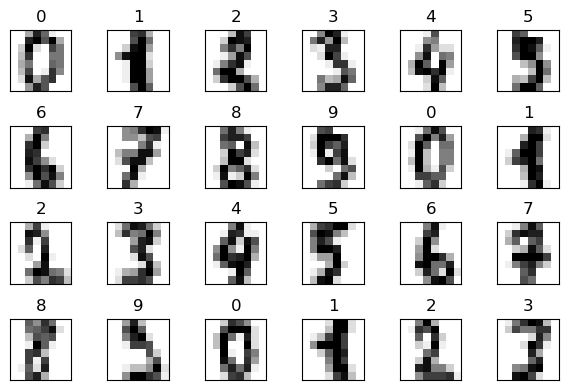

In [90]:
figure,axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4)) 
for ax, image, target in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)  
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(target)

plt.tight_layout()
plt.show()    
    

In [138]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, stratify=y, random_state = 42)

In [168]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
prediccion = knn.predict(X_test)
esperado = y_test
print(classification_report(y_test, prediccion, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.93      1.00      0.96        55
           2       1.00      1.00      1.00        53
           3       0.98      1.00      0.99        55
           4       1.00      0.98      0.99        54
           5       1.00      0.98      0.99        55
           6       1.00      0.98      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.88      0.92        52
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [170]:
confusion_matrix(y_test, prediccion)

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  4,  0,  1,  0,  0,  0,  1, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 52]], dtype=int64)

In [198]:
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],     
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]                       
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kf)
grid_search.fit(X_train, y_train)

print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor score en validación cruzada:")
print(grid_search.best_score_)


Mejores hiperparámetros encontrados:
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

Mejor score en validación cruzada:
0.9848826914563966


In [206]:
best_knn = grid_search.best_estimator_
pred_best = best_knn.predict(X_test)
print("\nReporte de clasificación del mejor KNN:")
print(classification_report(y_test, pred_best, zero_division=0))



Reporte de clasificación del mejor KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       0.98      1.00      0.99        54
           5       1.00      0.98      0.99        55
           6       0.98      1.00      0.99        54
           7       1.00      1.00      1.00        54
           8       0.98      0.92      0.95        52
           9       0.98      0.96      0.97        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



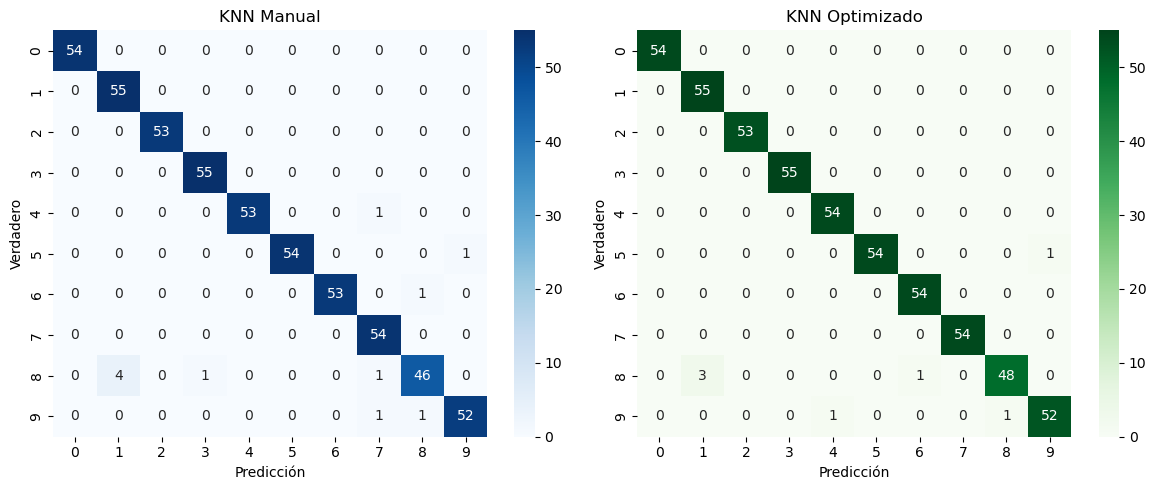

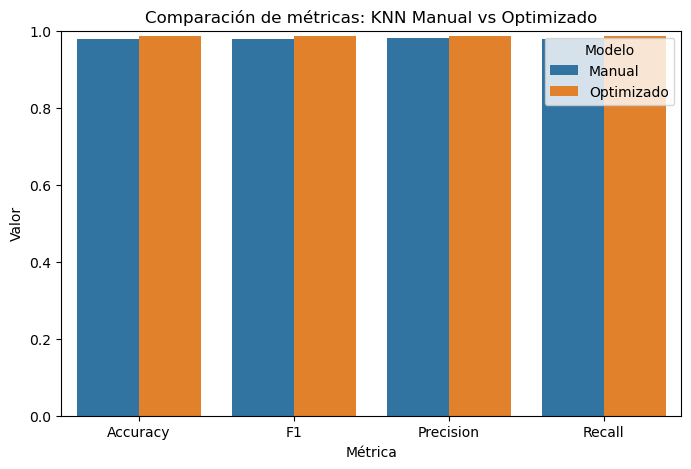

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


cm_manual = confusion_matrix(y_test, prediccion)
cm_best = confusion_matrix(y_test, pred_best)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("KNN Manual")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Verdadero")

sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("KNN Optimizado")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Verdadero")

plt.tight_layout()
plt.show()


metrics_manual = [
    accuracy_score(y_test, prediccion),
    f1_score(y_test, prediccion, average='weighted'),
    precision_score(y_test, prediccion, average='weighted'),
    recall_score(y_test, prediccion, average='weighted')
]

metrics_best = [
    accuracy_score(y_test, pred_best),
    f1_score(y_test, pred_best, average='weighted'),
    precision_score(y_test, pred_best, average='weighted'),
    recall_score(y_test, pred_best, average='weighted')
]

labels = ['Accuracy', 'F1', 'Precision', 'Recall']


df_metrics = pd.DataFrame({
    'Métrica': labels*2,
    'Valor': metrics_manual + metrics_best,
    'Modelo': ['Manual']*4 + ['Optimizado']*4
})

plt.figure(figsize=(8,5))
sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=df_metrics)
plt.ylim(0,1)
plt.title("Comparación de métricas: KNN Manual vs Optimizado")
plt.show()
